### Problem Statement


Use the dataset given to answer the following questions:

1. How many males and females were recorded?
2. What is the total number of smokers with respect to males and females?
3. How does the variables in the dataset relate to each other?
4. Which region has higher number of smokers?
5. How does gender, age and smoker correlate with the price of the insurance

### Import LIbraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
## Load dataset
data = pd.read_csv("C:\\Users\\Administrator\\Desktop\data\\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [124]:
data.shape

(1338, 7)

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the above summary:

Average age = 39 years
Minimum age = 18yrs
Maximum age = 64yrs
Maximum number of children is 5

### Number of males and females with respect to smokers

In [4]:
males = len(data[data['sex']=='male'])
females =len(data[data['sex']=='female'])
print('Number of males recorded: ',males)
print('Number of females recorded: ',females)

Number of males recorded:  676
Number of females recorded:  662


In [5]:
from matplotlib import style

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


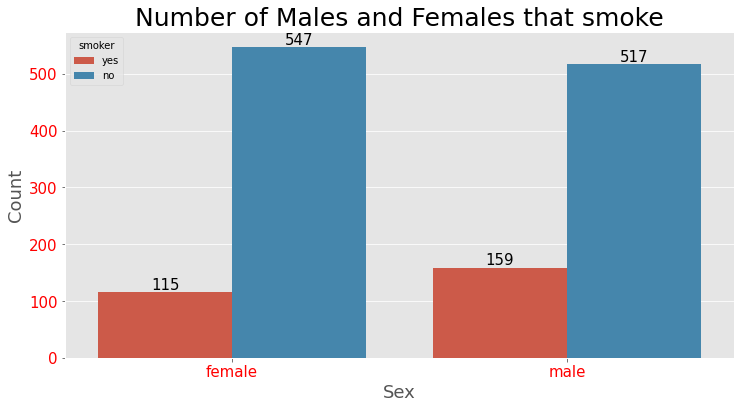

In [6]:
plt.figure(figsize=(12,6))
style.use('ggplot')
graph = sns.countplot(data['sex'], hue= 'smoker',data=data)
plt.xlabel("Sex", fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15, color='r')
plt.yticks(fontsize=15, color='r')
plt.title('Number of Males and Females that smoke', fontsize=25)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height+5,height ,ha="center", fontsize=15)

plt.show()

From the graph above:
1. Males smoke more than females

### Number of smokers in each region

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


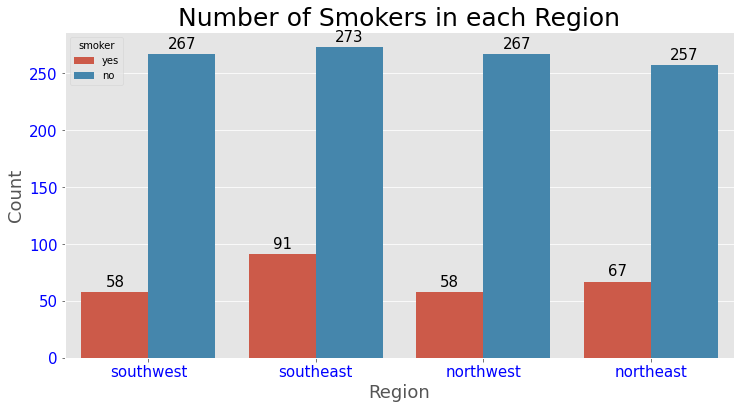

In [7]:
plt.figure(figsize=(12,6))
style.use('ggplot')
graph = sns.countplot(data['region'],hue='smoker', data=data)
plt.xlabel('Region', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15,color='b')
plt.yticks(fontsize=15, color='b')
plt.title('Number of Smokers in each Region',fontsize=25)


for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height+5,height ,ha="center", fontsize=15)
plt.show()

From the graph above:
1. Southeast has the higher number of smokers followed by northeast.
2. Southwest and Northwest has the same number of smokers

### Distribution of Ages

<Figure size 2700x1050 with 0 Axes>

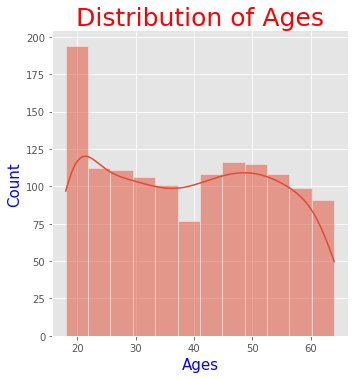

In [128]:
plt.figure(figsize=(18,7),dpi=150)
style.use('ggplot')
graph=sns.displot(data= data, x='age',kde=True)
plt.xlabel('Ages', fontsize=15,color='b')
plt.ylabel('Count',fontsize=15, color='b')
plt.title('Distribution of Ages', fontsize=25, color='r')
plt.show()


### Convert categorical data into numerical for modelling

In [71]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# sex
d = {'female':0, 'male':1}
data['sex'] = data['sex'].map(d)



In [9]:
# smoker
d={'yes':0, 'no':1}
data['smoker'] = data['smoker'].map(d)

# region
b= {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}
data['region'] = data['region'].map(b)

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


### Check the relationship between the variables

In [11]:
corr = data.corr()

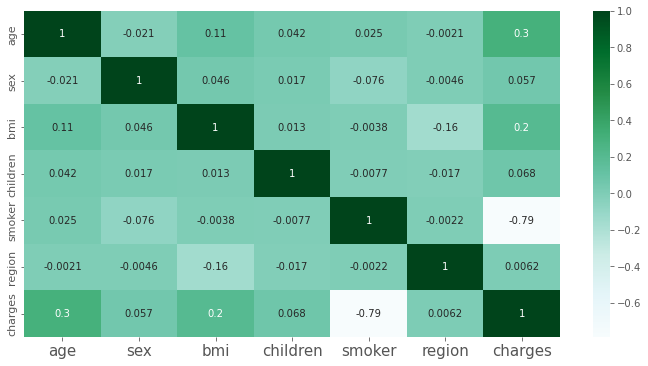

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap= 'BuGn')
plt.xticks(fontsize=15)
plt.yticks(fontsize=11)
plt.show()

From the above correlation heatmap;
1. Age and bmi has a correlation of 0.3 and 0.2 respectively with our target, charges.
2. The rest of the variables have small correlation with the target except smoker variable which has a negative correlation with the target, charges

### Lets build the model

In [55]:
x = data[['age','sex','bmi','children','region','smoker']]
y= data['charges']

In [56]:
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


#### Split the data set into train and test set

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [58]:
# print the train datasets
print(x_train.shape)
print(y_train.shape)

(1070, 6)
(1070,)


In [59]:
## print the test dataset
print(x_test.shape)
print(y_test.shape)

(268, 6)
(268,)


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scale= StandardScaler()
x_train = scale.fit_transform(x_train)
x_test= scale.fit_transform(x_test)

In [62]:
lr= LinearRegression()

#### Train the model

In [63]:
lr.fit(x_train, y_train)

LinearRegression()

#### Test the model

In [64]:
y_pred = lr.predict(x_test)

#### Check accuracy of the model

In [65]:
score=lr.score(x_test, y_test)
print(score)

0.7833237659369185


### The accuracy of the model is 78%

The model predicted 78% of the charges accurately

AttributeError: 'Line2D' object has no property 'kind'

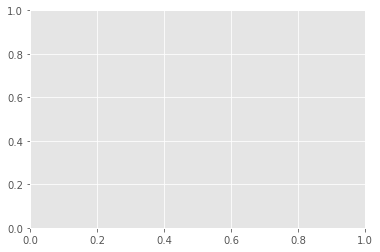

In [68]:
# Plot output
sns.(x_test,y_pred,kind='scatter', color='red')
plt.show()